# Backtesting SMA trading strategy using Vectorbt API

### Source code: 
https://pypi.org/project/vectorbt/ , https://vectorbt.dev/docs/index.html

In [1]:
# Import libraries
import vectorbt as vbt
import numpy as np
import pandas as pd
import plotly.io as pio

pio.renderers.default = 'svg' # comment this line out to get interactive charts

In [2]:
# Pull hostorical prices
price = vbt.YFData.download('BTC-USD', freq='D', fees=0.01, missing_index='drop').get('Close')
# Select time window to test.
price = price.loc["2015":"2021"]
price

Date
2015-01-01 00:00:00+00:00      314.248993
2015-01-02 00:00:00+00:00      315.032013
2015-01-03 00:00:00+00:00      281.082001
2015-01-04 00:00:00+00:00      264.195007
2015-01-05 00:00:00+00:00      274.473999
                                 ...     
2021-07-08 00:00:00+00:00    32877.371094
2021-07-09 00:00:00+00:00    33798.011719
2021-07-10 00:00:00+00:00    33520.519531
2021-07-11 00:00:00+00:00    34240.187500
2021-07-12 00:00:00+00:00    34269.675781
Name: Close, Length: 2381, dtype: float64

In [3]:
# Define shor and long SMA windows. Test different window combinations to see results of Buy & Hold vs SMA strategy
fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 20)
entries = fast_ma.ma_above(slow_ma, crossover=True)
exits = fast_ma.ma_below(slow_ma, crossover=True)

# Fit the model and input starting investment to calculate total profit form the trading stategy
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf.total_profit()

16576.279332070855

In [4]:
# Calculate total profit from the Buy & Hold strategy
pf1 = vbt.Portfolio.from_holding(price, init_cash=100)
pf1.total_profit()

10805.261927118643

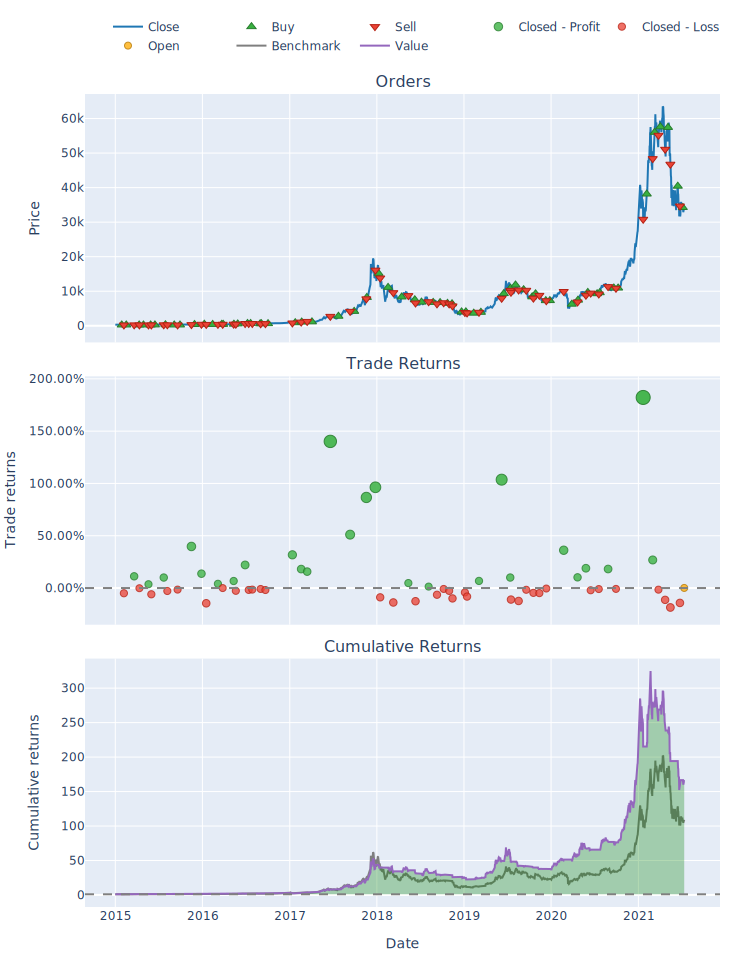

In [5]:
# Plot trading strategy
pf.plot().show()

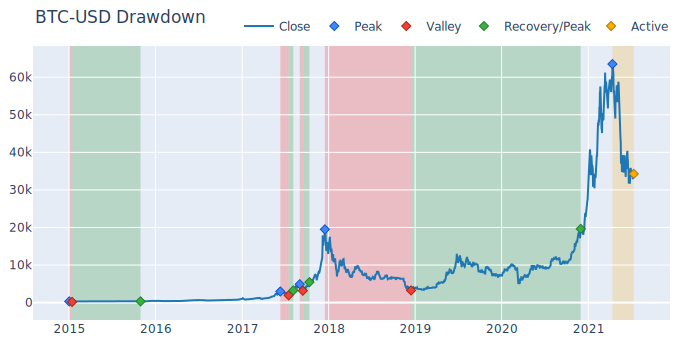

In [6]:
# Plot drawdown for the selected strategy
price.vbt.drawdowns.plot(title='BTC-USD Drawdown').show()

In [7]:
# Obtain complete stats for the trading strategy
pf.stats(freq='D')

Start                    2015-01-01 00:00:00+00:00
End                      2021-07-12 00:00:00+00:00
Duration                        2381 days 00:00:00
Initial Cash                                 100.0
Total Profit                          16576.279332
Total Return [%]                      16576.279332
Benchmark Return [%]                  10805.261927
Position Coverage [%]                    59.386812
Max Drawdown [%]                         58.757571
Avg Drawdown [%]                          9.103254
Max Drawdown Duration            526 days 00:00:00
Avg Drawdown Duration             34 days 14:24:00
Trade Count                                     60
Win Rate [%]                             43.333333
Best Trade [%]                          182.192871
Worst Trade [%]                         -18.570317
Avg Trade [%]                            12.981463
Max Trade Duration               102 days 00:00:00
Avg Trade Duration                23 days 10:48:00
Expectancy                     